**Author : VEDANT PATIL**

Task 7__DEC'20

**!!Stock Market Prediction using Numerical and Textual Analysis!!**

MACHINE STATS :

Intel i5 8th Gen ||12GB RAM || ON_BOARD 2GB RADEON GRAPHICS 

In [1]:
# Import the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib

<ipython-input-1-c5bdb1e35f0f>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
data_stock = pd.read_csv('D:\SPARKS FOUNDATION\BSESN.csv', parse_dates = True)

In [3]:
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [4]:
data_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3810,2020-12-03,44902.01953,44953.01172,44551.42188,44632.64844,44632.64844,30700.0
3811,2020-12-04,44665.91016,45148.28125,44665.91016,45079.55078,45079.55078,27600.0
3812,2020-12-07,45099.92188,45458.92188,45024.46875,45426.96875,45426.96875,18700.0
3813,2020-12-08,45568.80078,45742.23047,45335.17188,45608.51172,45608.51172,18200.0
3814,2020-12-09,45891.03906,46164.10156,45792.01172,46103.50000,46103.50000,20700.0


In [5]:
#Convert date column of the dataset using pandas library
data_stock['Date'] = pd.to_datetime(data_stock['Date'])

In [6]:
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [7]:
# setting column 'Date' as the index column
data_stock.set_index('Date', inplace= True, drop = False)

In [8]:
#Check NULL values
data_stock.dropna(inplace=True)

In [9]:
data_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-06-30,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
2005-07-01,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2005-07-04,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
2005-07-05,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
2005-07-06,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0


In [10]:
data_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3.786000e+03
mean,22740.864858,22875.676003,22560.892800,22715.241293,22715.241293,1.009703e+05
std,9174.661314,9190.642967,9131.685533,9157.592559,9157.592559,1.215640e+06
min,7154.270020,7218.279785,7123.109863,7145.129883,7145.129883,8.000000e+02
25%,16213.164795,16328.297608,16047.305420,16185.002445,16185.002445,1.070000e+04
50%,19863.480465,19990.479490,19670.885745,19827.810545,19827.810545,1.460000e+04
75%,28926.767577,29071.932132,28768.720705,28887.947270,28887.947270,2.040000e+04
max,45891.039060,46164.101560,45792.011720,46103.500000,46103.500000,3.181510e+07


In [11]:
data_stock.shape

(3786, 7)

In [12]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3786 entries, 2005-06-30 to 2020-12-09
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3786 non-null   datetime64[ns]
 1   Open       3786 non-null   float64       
 2   High       3786 non-null   float64       
 3   Low        3786 non-null   float64       
 4   Close      3786 non-null   float64       
 5   Adj Close  3786 non-null   float64       
 6   Volume     3786 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 236.6 KB


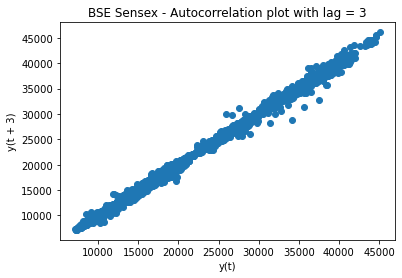

In [13]:
## Checking for Cross-correlation

plt.figure()
lag_plot(data_stock['Close'], lag=3)
plt.title('BSE Sensex - Autocorrelation plot with lag = 3')
plt.show()

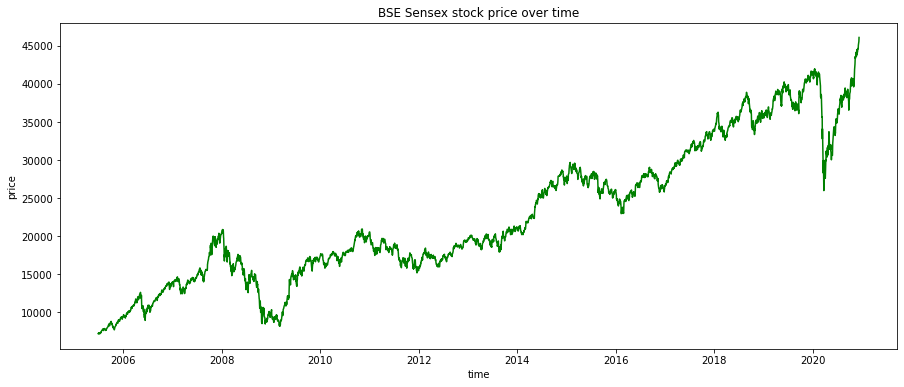

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data_stock["Close"], 'green')
plt.title("BSE Sensex stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

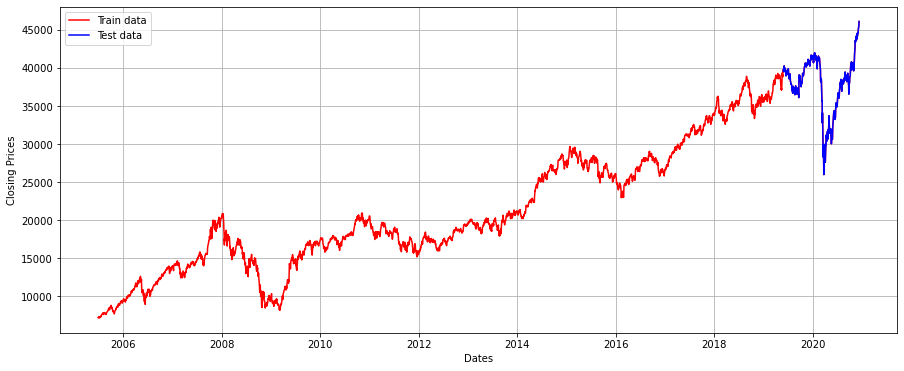

In [15]:
#split data into train and training set

train_data, test_data = data_stock[:int(len(data_stock)*0.9)], data_stock[int(len(data_stock)*0.9):]
plt.figure(figsize=(15,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(data_stock['Close'], 'red', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()

# **AUTO_ARIMA MODEL**

**Parameters of ARIMA MODEL**

p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib

In [17]:
# ARIMA MODEL is a popular statistical model for analyzing and forecasting Time series data

model_autoARIMA = auto_arima(train_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adf test to find the value of 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=47022.716, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47003.291, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47002.990, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=47026.063, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=47004.982, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=47004.967, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=47006.924, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=47005.566, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.414 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3407
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -23498.495
Date:                Sat, 12 Dec 2020   AIC                          47002.990
Time:                       

In [18]:
# Fitting the ARIMA model

model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3406
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -23498.474
Method:                       css-mle   S.D. of innovations            239.895
Date:                Sat, 12 Dec 2020   AIC                          47002.949
Time:                        21:01:18   BIC                          47021.349
Sample:                             1   HQIC                         47009.524
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.5389      4.441      2.148      0.032       0.836      18.242
ma.L1.D.Close     0.0803      0.017      4.695      0.000       0.047       0.114
                                    Root

C:\Users\VEDANT\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\VEDANT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

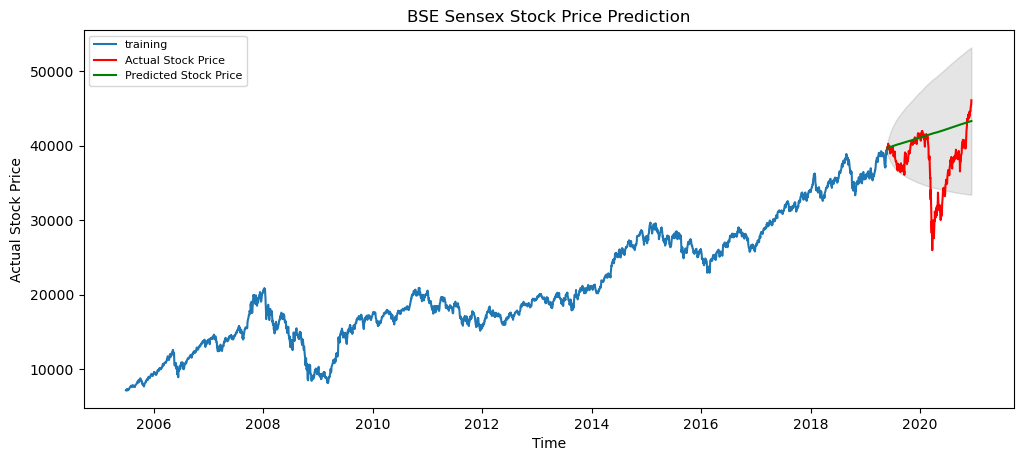

In [19]:
# Forecast

fc, se, conf = fitted.forecast(379, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'red', label='Actual Stock Price')
plt.plot(fc_series, color = 'green',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 26701360.831895422
MAE: 3680.8850502823866
RMSE: 5167.3359511353065
MAPE: 0.10767682493844292


In [21]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3406
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -23498.474
Method:                       css-mle   S.D. of innovations            239.895
Date:                Sat, 12 Dec 2020   AIC                          47002.949
Time:                        21:01:21   BIC                          47021.349
Sample:                             1   HQIC                         47009.524
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.5389      4.441      2.148      0.032       0.836      18.242
ma.L1.D.Close     0.0803      0.017      4.695      0.000       0.047       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -12.4537           +0.0000j           12.4537            0.5000
-----------------------------------------------------------------------------
"""

# STACKED LSTM(LONG SHORT TERM MEMORY)

**x(t) --> A1 --> h(t-1) _______ x(t) -->  A2 --> h(t)_______ x(t) --> A3 --> h(t+1)

In [27]:
new_stock = data_stock["Close"].copy()
new_stock = pd.DataFrame(new_stock)

In [28]:
new_stock

,Close
Date,
2005-06-30,7193.850098
2005-07-01,7210.770020
2005-07-04,7277.310059
2005-07-05,7220.250000
2005-07-06,7287.600098
...,...
2020-12-03,44632.648440
2020-12-04,45079.550780
2020-12-07,45426.968750


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
stock_data = scaler.fit_transform(new_stock)

In [31]:
print(stock_data)

[[0.00125057]
 [0.00168488]
 [0.00339286]
 ...
 [0.98263451]
 [0.98729443]
 [1.        ]]


In [32]:
stock_data.shape

(3786, 1)

In [36]:
##splitting dataset into train and test split
training_size=int(len(stock_data)*0.9) 
test_size=len(stock_data)-training_size
initial_train_data,test_data=stock_data[0:training_size,:],stock_data[training_size:len(stock_data),:1]

In [37]:
training_size,test_size

(3407, 379)

In [38]:
## Validation Data

train_data,cv_data = initial_train_data[0:int(len(initial_train_data)*0.8)],initial_train_data[int(len(initial_train_data)*0.8):]

In [39]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
import numpy
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape), print(y_train.shape)

(2624, 100)
(2624,)


(None, None)

In [42]:
print(X_test.shape), print(ytest.shape)

(278, 100)
(278,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
import tensorflow as tf

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
#A Sequential model is not appropriate when:

#Your model has multiple inputs or multiple outputs
#Any of your layers has multiple inputs or multiple outputs
#You need to do layer sharing

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
41/41 [==============================] - 5s 110ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 2/100
41/41 [==============================] - 3s 78ms/step - loss: 4.1582e-04 - val_loss: 0.0066
Epoch 3/100
41/41 [==============================] - 3s 78ms/step - loss: 3.7468e-04 - val_loss: 0.0039
Epoch 4/100
41/41 [==============================] - 3s 77ms/step - loss: 3.5689e-04 - val_loss: 0.0040
Epoch 5/100
41/41 [==============================] - 3s 76ms/step - loss: 3.4442e-04 - val_loss: 0.0036
Epoch 6/100
41/41 [==============================] - 3s 77ms/step - loss: 3.3862e-04 - val_loss: 0.0037
Epoch 7/100
41/41 [==============================] - 3s 77ms/step - loss: 3.1345e-04 - val_loss: 0.0035
Epoch 8/100
41/41 [==============================] - 3s 79ms/step - loss: 3.0724e-04 - val_loss: 0.0025
Epoch 9/100
41/41 [==============================] - 3s 81ms/step - loss: 3.0103e-04 - val_loss: 0.0031
Epoch 10/100
41/41 [==============================] - 3s 80ms/step 

41/41 [==============================] - 3s 78ms/step - loss: 6.3951e-05 - val_loss: 5.6224e-04
Epoch 78/100
41/41 [==============================] - 3s 78ms/step - loss: 5.5069e-05 - val_loss: 6.9577e-04
Epoch 79/100
41/41 [==============================] - 3s 77ms/step - loss: 5.6519e-05 - val_loss: 3.4275e-04
Epoch 80/100
41/41 [==============================] - 3s 77ms/step - loss: 6.1673e-05 - val_loss: 3.3818e-04
Epoch 81/100
41/41 [==============================] - 3s 77ms/step - loss: 5.5204e-05 - val_loss: 3.3489e-04
Epoch 82/100
41/41 [==============================] - 3s 78ms/step - loss: 5.6555e-05 - val_loss: 4.1767e-04
Epoch 83/100
41/41 [==============================] - 3s 77ms/step - loss: 6.0140e-05 - val_loss: 3.6243e-04
Epoch 84/100
41/41 [==============================] - 3s 77ms/step - loss: 5.7251e-05 - val_loss: 4.9172e-04
Epoch 85/100
41/41 [==============================] - 3s 78ms/step - loss: 5.5910e-05 - val_loss: 5.6342e-04
Epoch 86/100
41/41 [============

In [48]:
tf.__version__

'2.3.1'

In [55]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [56]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
rescaled_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
rescaled_ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [62]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(rescaled_ytrain,train_predict))

253.05414217338532

In [63]:
# report performance
mse = mean_squared_error(rescaled_ytest,test_predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(rescaled_ytest,test_predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(rescaled_ytest,test_predict))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_predict - rescaled_ytest)/np.abs(rescaled_ytest))
print('MAPE: '+str(mape))

MSE: 667211.1915025602
MAE: 564.256260391187
RMSE: 816.8299648657364
MAPE: 0.015723029553234864


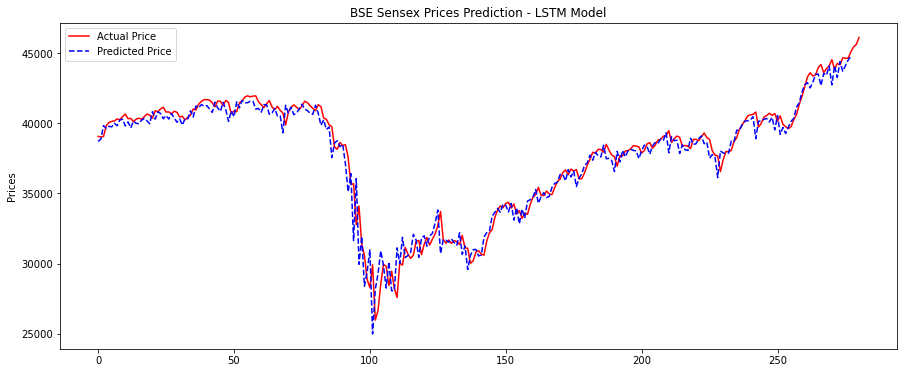

In [83]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(stock_data[3505:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', linestyle='dashed',label='Predicted Price')
plt.title('BSE Sensex Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [84]:
len(test_data)

379

In [89]:
x_input=test_data[279:].reshape(1,-1)
x_input.shape

(1, 100)

In [90]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [91]:
temp_input

[0.7770822625813496,
 0.7902075511512858,
 0.7886980270150505,
 0.7956015298872776,
 0.7953045382532526,
 0.7903205522852341,
 0.8046491483821334,
 0.7938216854073428,
 0.7852212588752845,
 0.7819054199525564,
 0.764777160531128,
 0.7839850636788384,
 0.7833540816863636,
 0.7926491597122789,
 0.7930372942762913,
 0.7966695771355337,
 0.8024432681119396,
 0.8014837102585761,
 0.7999656634352006,
 0.7888474252055426,
 0.7932993930234753,
 0.8055570685516316,
 0.8077765851725867,
 0.7976529986669001,
 0.8031544639324215,
 0.8125069953372455,
 0.813656960796926,
 0.8195618015104655,
 0.8205769073755527,
 0.8296594187572492,
 0.8081231089095771,
 0.8151180555457322,
 0.8198726299656507,
 0.8174318235429379,
 0.8011641583891675,
 0.8027055673295225,
 0.8013739174210639,
 0.7969735875436805,
 0.8135656171398553,
 0.8139308908912279,
 0.8114173907189692,
 0.8188027779704357,
 0.8254380658231788,
 0.8171471645603701,
 0.8137067934771478,
 0.7928722545176801,
 0.7851701227524432,
 0.783484830226

In [92]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98338836]
101
1 day input [0.79020755 0.78869803 0.79560153 0.79530454 0.79032055 0.80464915
 0.79382169 0.78522126 0.78190542 0.76477716 0.78398506 0.78335408
 0.79264916 0.79303729 0.79666958 0.80244327 0.80148371 0.79996566
 0.78884743 0.79329939 0.80555707 0.80777659 0.797653   0.80315446
 0.812507   0.81365696 0.8195618  0.82057691 0.82965942 0.80812311
 0.81511806 0.81987263 0.81743182 0.80116416 0.80270557 0.80137392
 0.79697359 0.81356562 0.81393089 0.81141739 0.81880278 0.82543807
 0.81714716 0.81370679 0.79287225 0.78517012 0.78348483 0.75486915
 0.77630379 0.79152436 0.79130849 0.79373957 0.80988811 0.81698924
 0.83241266 0.84022559 0.84802167 0.85641053 0.8585747  0.85938867
 0.86373245 0.83636148 0.8428959  0.8544113  0.85730592 0.86148827
 0.85766828 0.86092847 0.84706752 0.85673429 0.84134246 0.83691185
 0.83342656 0.83711018 0.85003554 0.85914813 0.87773257 0.8919246
 0.9100047  0.92746484 0.93557667 0.92950658 0.93170916 0.94479263
 0.95062809 0.9357381  0.94298401 

10 day output [[0.87213355]]
11 day input [0.78398506 0.78335408 0.79264916 0.79303729 0.79666958 0.80244327
 0.80148371 0.79996566 0.78884743 0.79329939 0.80555707 0.80777659
 0.797653   0.80315446 0.812507   0.81365696 0.8195618  0.82057691
 0.82965942 0.80812311 0.81511806 0.81987263 0.81743182 0.80116416
 0.80270557 0.80137392 0.79697359 0.81356562 0.81393089 0.81141739
 0.81880278 0.82543807 0.81714716 0.81370679 0.79287225 0.78517012
 0.78348483 0.75486915 0.77630379 0.79152436 0.79130849 0.79373957
 0.80988811 0.81698924 0.83241266 0.84022559 0.84802167 0.85641053
 0.8585747  0.85938867 0.86373245 0.83636148 0.8428959  0.8544113
 0.85730592 0.86148827 0.85766828 0.86092847 0.84706752 0.85673429
 0.84134246 0.83691185 0.83342656 0.83711018 0.85003554 0.85914813
 0.87773257 0.8919246  0.9100047  0.92746484 0.93557667 0.92950658
 0.93170916 0.94479263 0.95062809 0.9357381  0.94298401 0.94798675
 0.95943156 0.94159411 0.95267354 0.94984951 0.96283062 0.96187056
 0.96224556 0.9737168

20 day output [[0.84284747]]
21 day input [0.80555707 0.80777659 0.797653   0.80315446 0.812507   0.81365696
 0.8195618  0.82057691 0.82965942 0.80812311 0.81511806 0.81987263
 0.81743182 0.80116416 0.80270557 0.80137392 0.79697359 0.81356562
 0.81393089 0.81141739 0.81880278 0.82543807 0.81714716 0.81370679
 0.79287225 0.78517012 0.78348483 0.75486915 0.77630379 0.79152436
 0.79130849 0.79373957 0.80988811 0.81698924 0.83241266 0.84022559
 0.84802167 0.85641053 0.8585747  0.85938867 0.86373245 0.83636148
 0.8428959  0.8544113  0.85730592 0.86148827 0.85766828 0.86092847
 0.84706752 0.85673429 0.84134246 0.83691185 0.83342656 0.83711018
 0.85003554 0.85914813 0.87773257 0.8919246  0.9100047  0.92746484
 0.93557667 0.92950658 0.93170916 0.94479263 0.95062809 0.9357381
 0.94298401 0.94798675 0.95943156 0.94159411 0.95267354 0.94984951
 0.96283062 0.96187056 0.96224556 0.97371684 0.98263451 0.98729443
 1.         0.98338836 0.95291865 0.92973554 0.91509575 0.9072445
 0.90177399 0.89610654

In [93]:
day_new=np.arange(1,100)
day_pred=np.arange(101,131)

In [94]:
len(stock_data)

3786

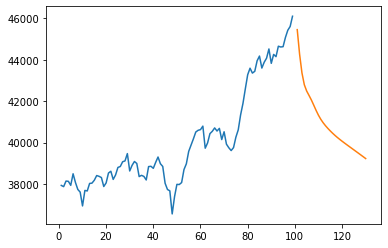

In [97]:
plt.plot(day_new,scaler.inverse_transform(stock_data[3687:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

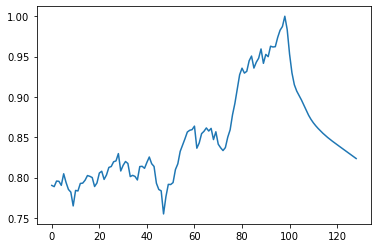

In [100]:
new_stock=stock_data.tolist()
new_stock.extend(lst_output)
plt.plot(new_stock[3687:])

# Textual Analysis 

In [101]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\VEDANT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [102]:
cols = ['Date','Category','News']
df_news = pd.read_csv('D:\SPARKS FOUNDATION\india-news-headlines.csv', names = cols)
df_news

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
1048571,20110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...
1048572,20110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...
1048573,20110207,city.patna,Central team to visit Kutku dam in Bihar
1048574,20110207,city.bhubaneswar,Red bandh evokes lukewarm response


In [103]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1 to 1048575
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1048575 non-null  object
 1   News    1048575 non-null  object
dtypes: object(2)
memory usage: 24.0+ MB


In [104]:
df_news.head()

,Date,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [105]:
#Converting data type of Date column 
df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
1048571,2011-02-07,Banned trio summoned by Pakistan govt over fix...
1048572,2011-02-07,Nadal pips Messi to bag Laureus 'World Sportsm...
1048573,2011-02-07,Central team to visit Kutku dam in Bihar
1048574,2011-02-07,Red bandh evokes lukewarm response


In [106]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news.head(10)

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
5,2001-01-06,Light combat craft takes India into club class...
6,2001-01-07,Muslim body rules out talks on Ayodhya Bajrang...
7,2001-01-08,Sangh Parivar; Babri panel up the ante Frontru...
8,2001-01-09,Financier Bharat Shah held for alleged links w...
9,2001-01-10,Fend for yourselves; Pande tells doctors Burea...


In [107]:
df_news.shape

(3649, 2)

In [108]:
df_news.tail()

,Date,News
3644,2011-02-03,All's not well with Deepika; Akshay Arshad ups...
3645,2011-02-04,Abhishek Bachchan Wish the star a very happy b...
3646,2011-02-05,Abhishek Bachchan Labourers clash List of LGT ...
3647,2011-02-06,Akki; Urmila meet after 14 years No melody in ...
3648,2011-02-07,Venky in Nagavalli 2? Lata apologizes to Dev A...


In [109]:
#Cleaning headlines
ps= PorterStemmer()
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [110]:
df_news['News'] = pd.Series(c)
df_news

,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...
3645,2011-02-04,abhishek bachchan wish star happi birthday per...
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...
3647,2011-02-06,akki urmila meet year melodi today music lesli...


In [111]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [112]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

,Date,News,Subjectivity,Polarity
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
...,...,...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...,0.349123,0.065558
3645,2011-02-04,abhishek bachchan wish star happi birthday per...,0.362757,0.060614
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...,0.378588,0.043108
3647,2011-02-06,akki urmila meet year melodi today music lesli...,0.395333,0.087425


In [113]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
3644,2011-02-03,well deepika akshay arshad upset wife maria pa...,0.349123,0.065558,-0.9996,0.149,0.750,0.101
3645,2011-02-04,abhishek bachchan wish star happi birthday per...,0.362757,0.060614,-0.9998,0.148,0.764,0.087
3646,2011-02-05,abhishek bachchan labour clash list lgt bank a...,0.378588,0.043108,-0.9999,0.160,0.763,0.077
3647,2011-02-06,akki urmila meet year melodi today music lesli...,0.395333,0.087425,-0.9998,0.144,0.772,0.084


In [ ]:
stock_data

In [114]:
df_merge = pd.merge(data_stock, df_news, how='inner', on='Date')
df_merge

,Date,Close,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2005-06-30,7193.850098,us kid hit fat camp big way expert add milk te...,0.360556,0.149795,-0.6124,0.133,0.733,0.133
1,2005-07-01,7210.770020,kuch meetha ho jay bachk rehna baba silsiilay ...,0.415661,0.150971,0.9850,0.060,0.797,0.144
2,2005-07-04,7277.310059,boogeyman bush judg test gladiat strike back v...,0.322655,0.083369,-0.4153,0.111,0.796,0.093
3,2005-07-05,7220.250000,great fun pierc sport call hedon narain hit pi...,0.407689,0.081862,-0.9657,0.183,0.677,0.139
4,2005-07-06,7287.600098,hero dec prove mettl govt corner arkavathi lay...,0.440829,0.044179,-0.9920,0.165,0.732,0.103
...,...,...,...,...,...,...,...,...,...
1369,2011-02-01,18022.220700,ye heard priyanka warm kareena ranbir mr conge...,0.389827,0.100862,-0.9996,0.140,0.763,0.096
1370,2011-02-02,18090.619140,trampl death eleph chittoor ratan deepika anni...,0.364539,0.079085,-0.9998,0.153,0.761,0.086
1371,2011-02-03,18449.310550,well deepika akshay arshad upset wife maria pa...,0.349123,0.065558,-0.9996,0.149,0.750,0.101
1372,2011-02-04,18008.150390,abhishek bachchan wish star happi birthday per...,0.362757,0.060614,-0.9998,0.148,0.764,0.087


In [115]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,7193.850098,0.360556,0.149795,-0.6124,0.133,0.733,0.133
1,7210.770020,0.415661,0.150971,0.9850,0.060,0.797,0.144
2,7277.310059,0.322655,0.083369,-0.4153,0.111,0.796,0.093
3,7220.250000,0.407689,0.081862,-0.9657,0.183,0.677,0.139
4,7287.600098,0.440829,0.044179,-0.9920,0.165,0.732,0.103
...,...,...,...,...,...,...,...
1369,18022.220700,0.389827,0.100862,-0.9996,0.140,0.763,0.096
1370,18090.619140,0.364539,0.079085,-0.9998,0.153,0.761,0.086
1371,18449.310550,0.349123,0.065558,-0.9996,0.149,0.750,0.101
1372,18008.150390,0.362757,0.060614,-0.9998,0.148,0.764,0.087


In [116]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.003534,0.406048,0.424047,0.193769,0.374359,0.519553,0.505319
1,0.004761,0.571075,0.426124,0.992549,0.000000,0.877095,0.563830
2,0.009587,0.292546,0.306735,0.292329,0.261538,0.871508,0.292553
3,0.005448,0.547202,0.304073,0.017102,0.630769,0.206704,0.537234
4,0.010333,0.646448,0.237521,0.003950,0.538462,0.513966,0.345745


In [117]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [118]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.406048,0.424047,0.193769,0.374359,0.519553,0.505319
1,0.571075,0.426124,0.992549,0.000000,0.877095,0.563830
2,0.292546,0.306735,0.292329,0.261538,0.871508,0.292553
3,0.547202,0.304073,0.017102,0.630769,0.206704,0.537234
4,0.646448,0.237521,0.003950,0.538462,0.513966,0.345745


In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)
x_train.shape

(824, 6)

In [120]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
13,0.415661,0.294624,0.004800,0.538462,0.558659,0.308511
1213,0.441297,0.356140,0.000250,0.543590,0.519553,0.340426
688,0.607727,0.384581,0.002200,0.400000,0.642458,0.367021
682,0.697456,0.342962,0.000300,0.600000,0.530726,0.265957
1253,0.503312,0.284445,0.279778,0.215385,0.849162,0.361702
1061,0.504745,0.256338,0.000200,0.461538,0.625698,0.319149
689,0.417920,0.308502,0.002200,0.415385,0.586592,0.409574
523,0.419412,0.383055,0.001600,0.456410,0.564246,0.382979
495,0.528261,0.051907,0.000950,0.389744,0.798883,0.234043
994,0.590906,0.276480,0.000200,0.430769,0.670391,0.308511


In [121]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [122]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.47186779 0.59315551 0.60792446 0.28673281 0.37097725 0.54363796
 0.27395576 0.54200522 0.6682102  0.49838995]
898     0.127467
1294    0.982259
679     0.616457
31      0.045194
253     0.274524
535     0.578546
184     0.299900
760     0.522507
1310    0.997178
999     0.593791
Name: Close, dtype: float64
0.04308067659223776


In [123]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [124]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.1491744  0.93997243 0.56934073 0.26803264 0.20997579 0.50641925
 0.37542097 0.11285275 0.65410033 0.74748876]
898     0.127467
1294    0.982259
679     0.616457
31      0.045194
253     0.274524
535     0.578546
184     0.299900
760     0.522507
1310    0.997178
999     0.593791
Name: Close, dtype: float64
0.08079582853598845


In [125]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.04858612765644076


**REFERENCE :** 
https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/ 

https://jfin-swufe.springeropen.com/articles/10.1186/s40854-019-0131-7#:~:text=Support%20Vector%20Machines%20(SVM)%20and,learning%20patterns%20and%20then%20predicting

https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://keras.io/guides/sequential_model/

https://github.com/krishnaik06/Stock-MArket-Forecasting